# Finding a formula to fit Wilks coefficients

The Wilks coefficients are used to compare the weights lifted by athletes of different body weights. The weight lifted is multiplied by the coefficient according to the body weight. The higher the product, the better the athlete has performed. Weights must be given in kilograms.

Unfortunately, the creator of the formula, Robert Wilks, CEO of Powerlifting Australia, hasn't published the formula on which the coefficients are based on. Only two tables of coefficients are [available](https://powerliftingaustralia.com/wilks-formula/), one for men, one for women.

The following code extracts the coefficients from those tables (see the files wilks-men.tsv and wilks-women.tsv) and fits a reciprocal polynomial on them.

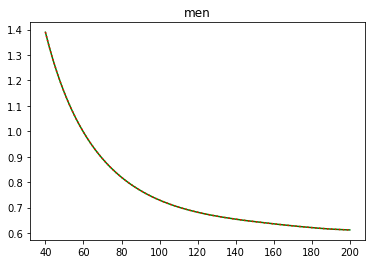

[ 1.66863245e+04  3.00964744e+03  2.59579992e+01 -4.93117674e-01
  2.50087040e-03 -4.26922134e-06  2.12615236e+05]


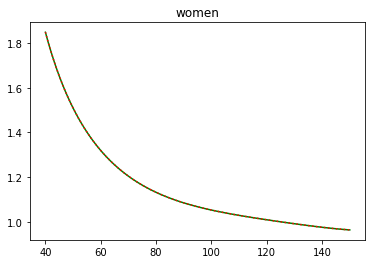

[-1.21437467e+04  1.32850402e+03 -3.17105519e+00 -1.02331664e-01
  9.13213300e-04 -2.26937197e-06  5.81926216e+04]


In [18]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# curve_fit() returns nonsense unless you pass some initial values for parameter p0.
# The following parameters are taken from https://en.wikipedia.org/wiki/Wilks_Coefficient
p0 = {
    'men': (-216.0475144, 16.2606339, -0.002388645, -0.00113732, 7.01863e-6, -1.291e-8, 500),
    'women': (594.31747775582, -27.23842536447, 0.82112226871, -0.00930733913, 4.731582e-5, -9.054e-8, 500)
}

# A polynomial like the following seems to be a good candidate for a fitting function
def wilks(x, a, b, c, d, e, f, g):
    return g / (a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5)

# Read coefficients from file and run the optimization. Returns values for a, b, c, ... g
def optimize(sex: str) -> ():
    csv = pd.read_csv(f'wilks-{sex}.tsv', delimiter='\t')
    bwt = csv['BWT'].values
    coeff = csv['0'].values
    popt, pcov = curve_fit(wilks, bwt, coeff, p0=p0[sex])
    x = np.arange(bwt[0], bwt[-1] + 1, 1)
    y = wilks(x, *popt)
    fig, ax = plt.subplots()
    ax.set_title(sex)
    plt.plot(bwt, coeff, 'g-', x, wilks(x, *popt), 'r:')
    plt.show()
    return popt

params = {}
for sex in ['men', 'women']:
    params[sex] = optimize(sex)
    print(params[sex])

In [17]:
# you can now use the parameters to calculate the coefficient from the body weight
bodyweight_kg = 65
coeff = wilks(bodyweight_kg, *params['women'])
lifted_kg = 190

# multiply coefficient with weight lifted to get Wilks points
wilks_points = lifted_kg * coeff
print(f'A woman weighing {bodyweight_kg} kg who lifted {lifted_kg} kg earns {round(wilks_points, 4)} Wilks points.')

A woman weighing 65 kg who lifted 190 kg earns 238.4081 Wilks points.
